<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/4_Clasificador_Bayesiano_Columna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install -U -q PyDrive

In [42]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [43]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [44]:
downloaded = drive.CreateFile({'id':'19O6DclsitAxQkLZdrXjivi4UOvDOZeQw'})
downloaded.GetContentFile('vertebralcolumn-3C.csv')

In [45]:
import pandas as pd
data = pd.read_csv('vertebralcolumn-3C.csv', header=(0))
data.head(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia


In [46]:
data.shape

(310, 7)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import random
import pandas as pd
import numpy as np

random.seed(42) # Define la semilla

data = pd.read_csv('vertebralcolumn-3C.csv', header=(0))

data = data.dropna(axis='rows') #removiendo NaN
# almacena los nombres de las classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

nrow, ncol = data.shape
print("Matriz de atributos: Número de filas:", nrow, " columnas: ", ncol)
attributes = list(data.columns)
data.head(10)

Matriz de atributos: Número de filas: 310  columnas:  7


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [50]:
print(classes)

['Hernia' 'Spondylolisthesis' 'Normal']


In [51]:
data.head(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia


<Axes: xlabel='count', ylabel='class'>

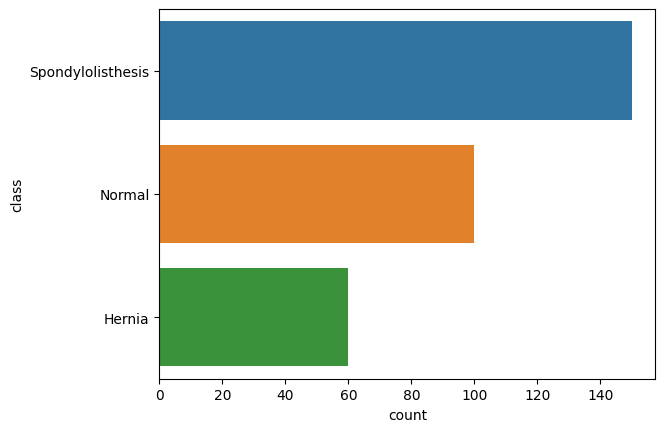

In [54]:
sns.countplot(data=data, y="class",order=data["class"].value_counts().index)

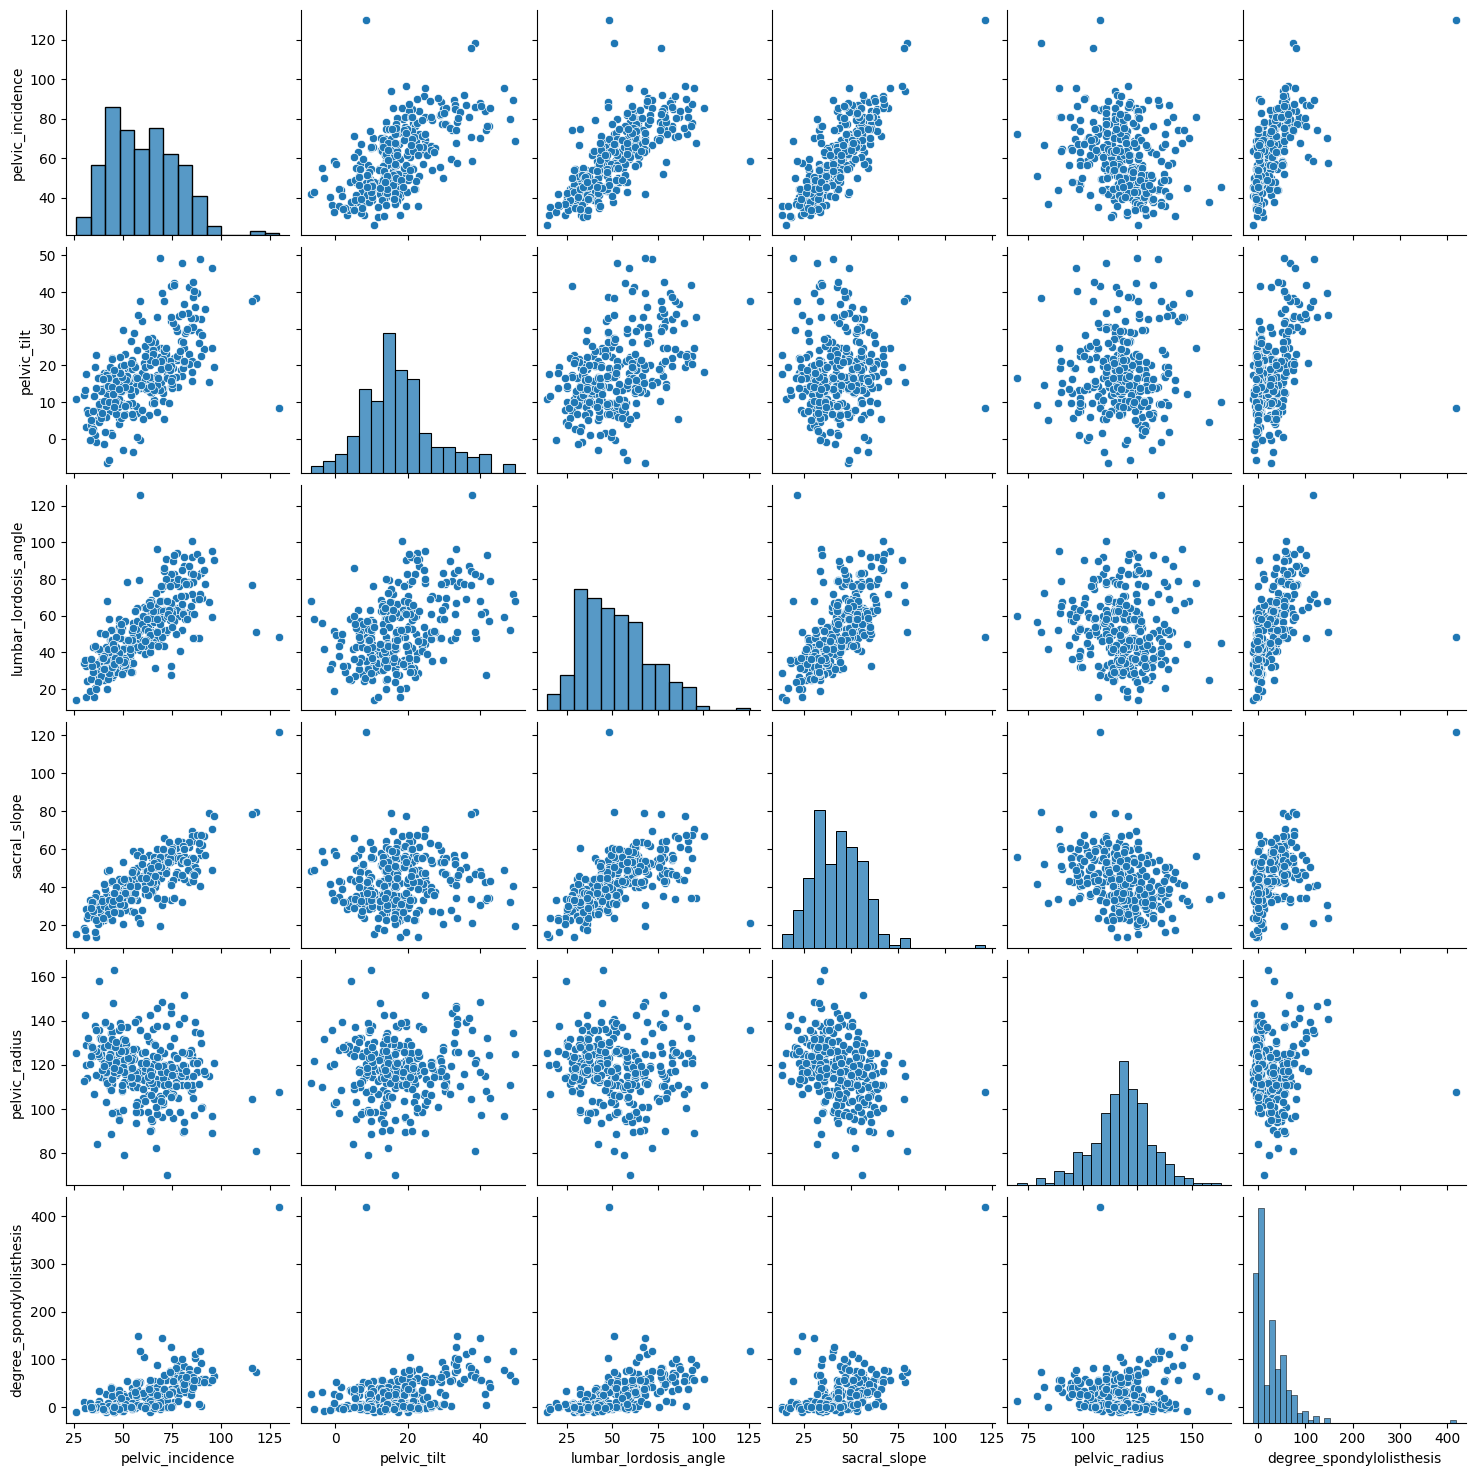

In [55]:
sns.pairplot(data)

In [53]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [13]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [15]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desviación típica:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 1.03143300e-16 -4.58414668e-17 -2.97969534e-16 -6.87622002e-17
  3.49541185e-16 -6.87622002e-17]
Desviación típica: [1. 1. 1. 1. 1. 1.]


In [16]:
from sklearn.model_selection import train_test_split
p = 0.8 # fracción de elementos en el conjunto de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

In [18]:
from scipy.stats import multivariate_normal

#matriz para almacenar probabilidades
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes)

Pc = np.zeros(len(classes)) #fracción de elementos en cada clase
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = x_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

In [19]:
P

,Hernia,Spondylolisthesis,Normal
0,1.168653e-04,9.731296e-07,3.383048e-04
1,1.208076e-09,1.910590e-07,1.999392e-13
2,1.921269e-03,5.057518e-06,5.847422e-04
3,3.366945e-28,4.505640e-06,1.699815e-20
4,7.359957e-04,1.119483e-06,3.651330e-05
...,...,...,...
57,1.585157e-13,1.708744e-05,2.187591e-09
58,3.788417e-18,1.378249e-06,7.876797e-14
59,3.993352e-04,9.257917e-07,1.352013e-04
60,7.740226e-11,7.244666e-07,2.230661e-08


In [20]:
y_pred = []

for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
print(y_pred)

['Normal' 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia'
 'Hernia' 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Hernia'
 'Normal' 'Hernia' 'Hernia' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Normal' 'Normal'
 'Spondylolisthesis' 'Hernia' 'Spondylolisthesis' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Hernia'
 'Spondylolisthesis' 'Normal' 'Normal' 'Spondylolisthesis' 'Normal'
 'Normal' 'Hernia' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Hernia' 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis']


In [21]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8225806451612904


REGRESION LOGISTICA

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clasificador = LogisticRegression(max_iter=500)
clasificador.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [25]:
y_pred = clasificador.predict(x_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

           Hernia       0.67      0.67      0.67        12
           Normal       0.76      0.72      0.74        18
Spondylolisthesis       0.97      1.00      0.98        32

         accuracy                           0.85        62
        macro avg       0.80      0.80      0.80        62
     weighted avg       0.85      0.85      0.85        62



In [29]:
confusion_matrix(y_test,y_pred)

array([[ 8,  4,  0],
       [ 4, 13,  1],
       [ 0,  0, 32]])

Se observa que el modelo de regresión logística tiene mayor accuracy, cabe resaltar que se observó que las varibale class se encuentran desbalanceadas y que va influir en el aprendizaje. Es mejor efectuar antes el balanceo antes de ingresar al modelo.